In [1]:
import dgl
import torch
import pickle
import seaborn as sns
from umap import umap_ as umap
from pynndescent import NNDescent
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Load Embedding -> EfficientNet on CIFAR10

In [2]:
with open("EfficientNet_CIFAR_10_Embeddings.pickle", "rb") as f:
    data = pickle.load(f)

data

{'embeddings': tensor([[ 0.0164,  0.0071, -0.0130,  ..., -0.0511,  0.0208, -0.0876],
         [ 0.1384, -0.0211, -0.1930,  ...,  0.2003, -0.0890,  0.0379],
         [-0.0402, -0.0446,  0.2166,  ..., -0.0850, -0.0701,  0.1180],
         ...,
         [ 0.2180, -0.0264, -0.0910,  ..., -0.2940, -0.0396, -0.1942],
         [ 0.0967,  0.0882, -0.2677,  ...,  0.2245, -0.0122, -0.0118],
         [ 0.0747, -0.0151,  0.0196,  ..., -0.2787,  0.0105, -0.0786]]),
 'labels': tensor([4, 1, 6,  ..., 5, 1, 7])}

In [3]:
embeddings = data["embeddings"]
labels = data["labels"]

### Create t-SNE Plot

In [4]:
%%time

tsne_obj = TSNE(n_components=2, init="pca", learning_rate="auto", random_state=42)
tsne_out = tsne_obj.fit_transform(embeddings)

/home/anirban/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: user 26min 24s, sys: 3min 7s, total: 29min 31s
Wall time: 3min 45s


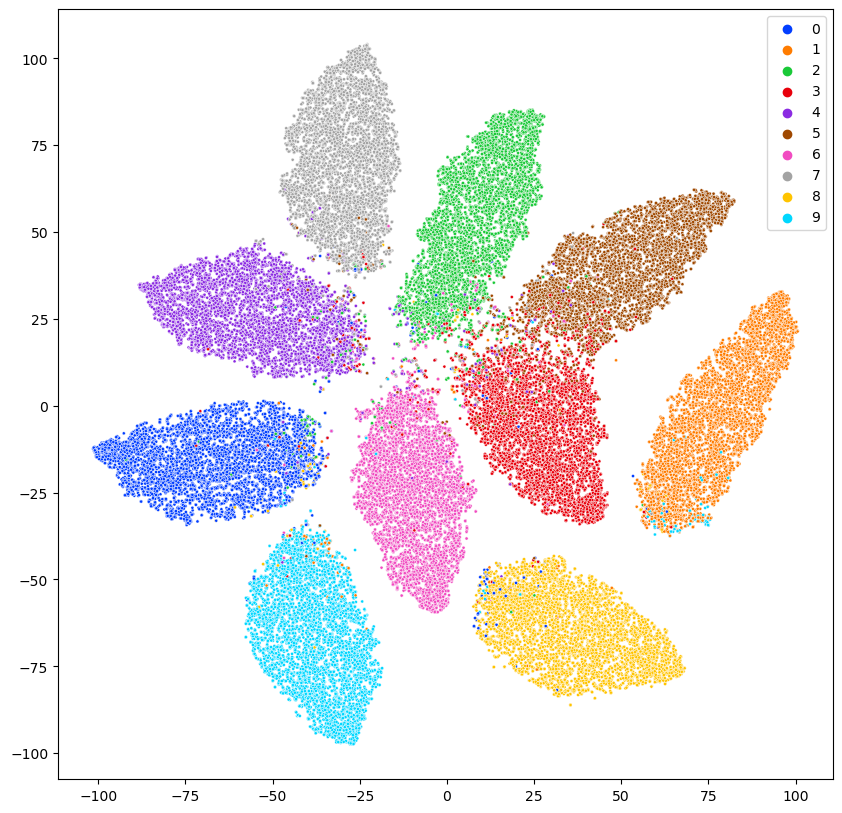

In [5]:
plt.subplots(figsize=[10, 10])
sns.scatterplot(x=tsne_out[:, 0], y=tsne_out[:, 1], hue=labels, palette=sns.color_palette("bright"), linewidth=0.3, alpha=1, s=5);

### Create UMAP Plot

In [6]:
%%time

umap_obj = umap.UMAP()
umap_out = umap_obj.fit_transform(embeddings)

CPU times: user 9min 49s, sys: 9.55 s, total: 9min 58s
Wall time: 36.4 s


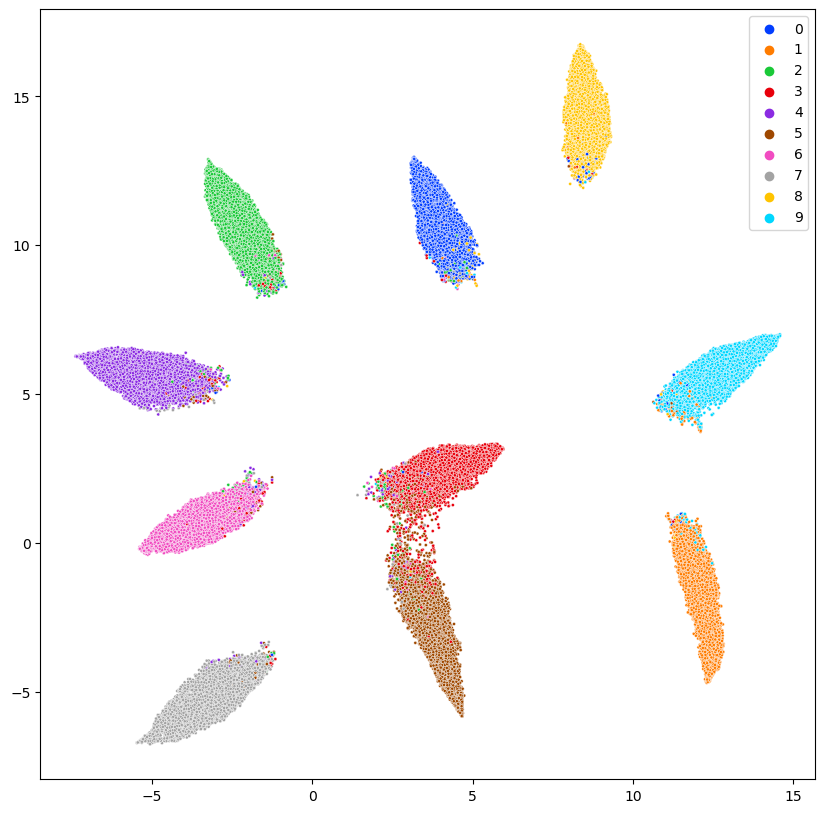

In [7]:
plt.subplots(figsize=[10, 10])
sns.scatterplot(x=umap_out[:, 0], y=umap_out[:, 1], hue=labels, palette=sns.color_palette("bright"), linewidth=0.3, alpha=1, s=5);

# Load Embedding -> ResNet50 on Food-101

In [8]:
with open("Data_ResNet50_Food.pickle", "rb") as f:
    data = pickle.load(f)

data

{'embeddings': tensor([[ 7.9621e-01, -1.2096e+00,  5.5755e-01,  ..., -5.0354e-01,
          -2.2792e-01,  3.1506e+00],
         [-1.9918e+00,  2.4370e-01,  4.1959e+00,  ...,  8.2198e-02,
           1.9905e+00,  5.2275e-02],
         [ 1.2043e+00, -2.7980e-01, -1.3739e-01,  ...,  1.4121e+00,
           4.9347e-01, -1.1513e+00],
         ...,
         [ 1.6389e-01,  2.0799e+00, -1.7151e+00,  ..., -5.5870e-01,
          -3.5630e-04, -1.4565e+00],
         [ 1.1402e+00,  9.0774e-01, -7.2882e-01,  ..., -1.2790e-01,
           1.8302e+00,  1.0357e+00],
         [ 4.4231e-01,  1.4246e+00,  9.6590e-01,  ..., -1.1585e+00,
           2.6971e+00,  1.1244e+00]]),
 'y_soft': tensor([[1.7324e-09, 1.9829e-09, 4.5585e-09,  ..., 1.3555e-09, 3.9792e-08,
          8.9370e-09],
         [3.8897e-09, 5.6096e-11, 3.7465e-10,  ..., 1.6176e-08, 3.0090e-10,
          5.6532e-09],
         [7.3515e-08, 2.4983e-07, 4.3329e-08,  ..., 5.8277e-07, 9.8786e-01,
          3.2346e-08],
         ...,
         [1.4391e-0

In [9]:
embeddings = data["embeddings"]
labels = data["labels"]

### Create t-SNE Plot

In [10]:
%%time

tsne_obj = TSNE(n_components=2, init="pca", learning_rate="auto", random_state=42)
tsne_out = tsne_obj.fit_transform(embeddings)

/home/anirban/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


CPU times: user 43min 36s, sys: 4min 50s, total: 48min 26s
Wall time: 7min 22s


/tmp/ipykernel_2597169/1170719182.py:2: UserWarning: 
The palette list has fewer values (10) than needed (101) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=tsne_out[:, 0], y=tsne_out[:, 1], hue=labels, palette=sns.color_palette("bright"), linewidth=0.3, alpha=1, s=5)


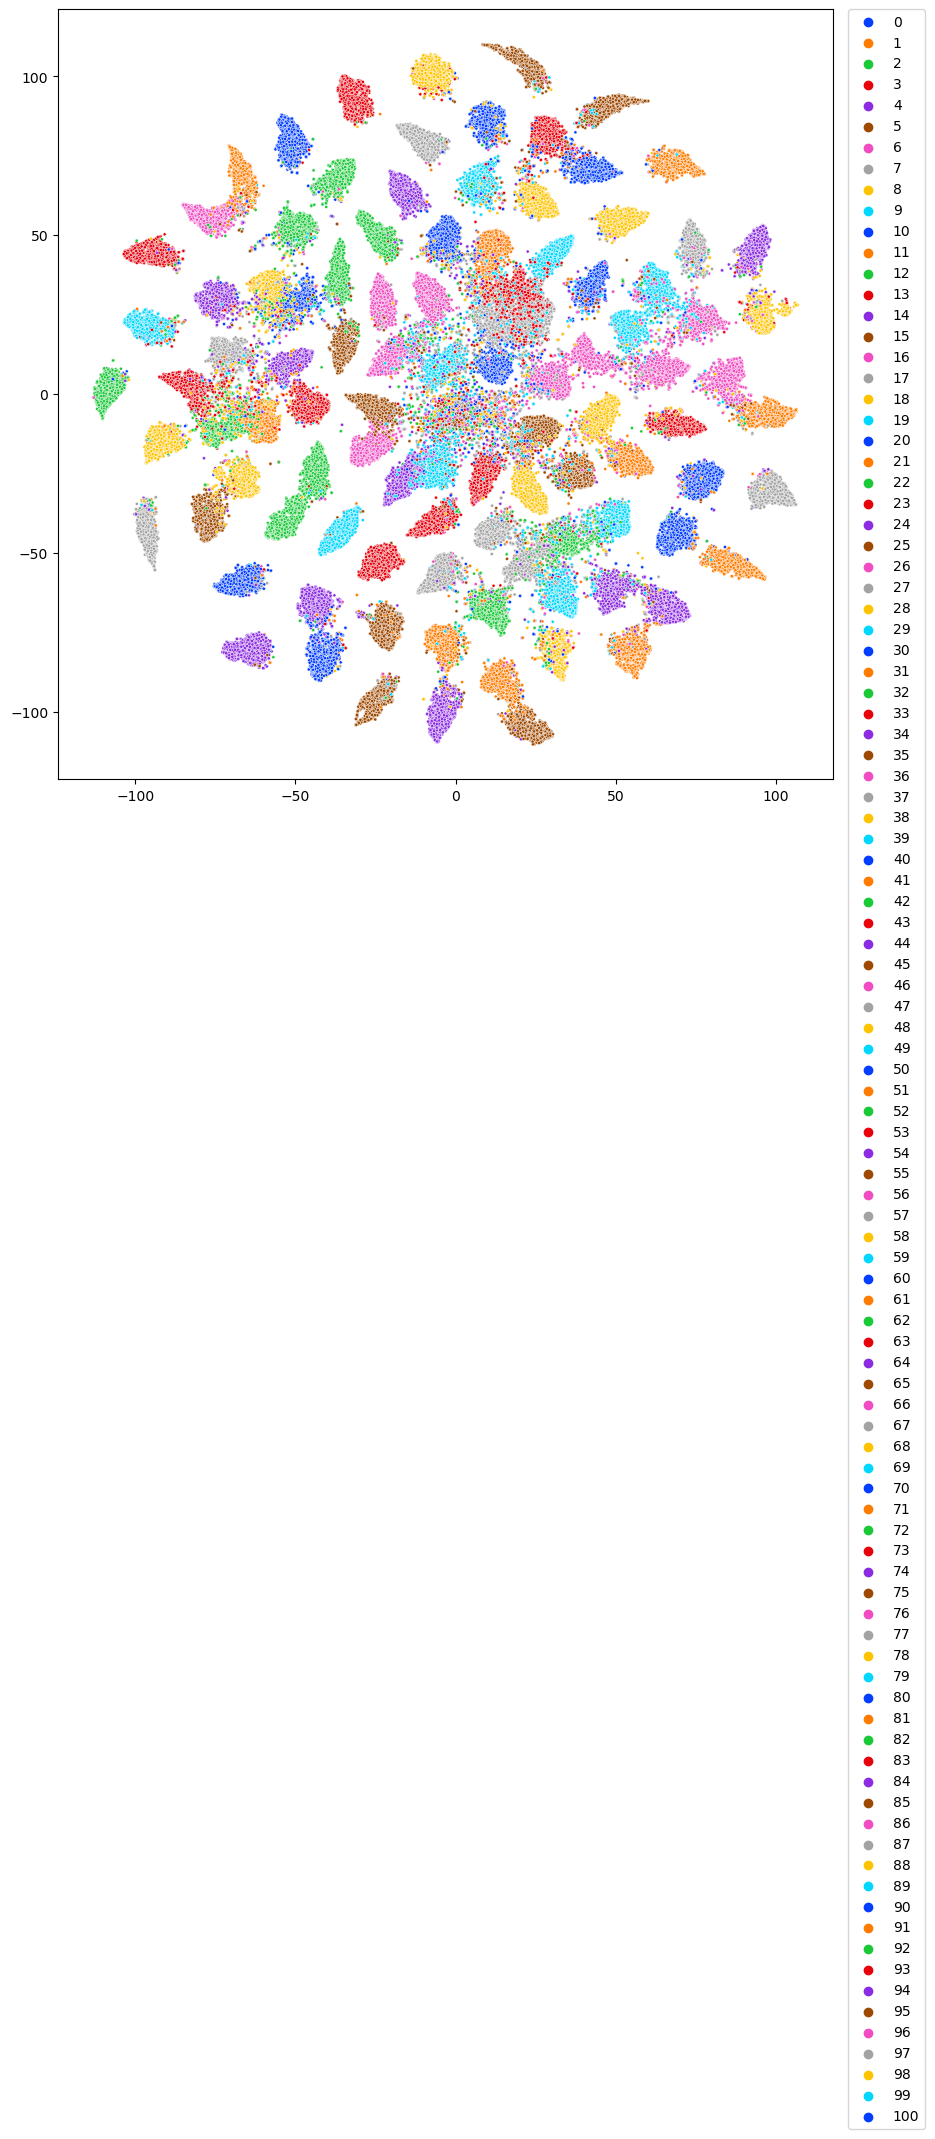

In [14]:
plt.subplots(figsize=[10, 10])
sns.scatterplot(x=tsne_out[:, 0], y=tsne_out[:, 1], hue=labels, palette=sns.color_palette("bright"), linewidth=0.3, alpha=1, s=5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### Create UMAP Plot

In [15]:
%%time

umap_obj = umap.UMAP()
umap_out = umap_obj.fit_transform(embeddings)

CPU times: user 16min 35s, sys: 16.7 s, total: 16min 52s
Wall time: 42.8 s


/tmp/ipykernel_2597169/3266089901.py:2: UserWarning: 
The palette list has fewer values (10) than needed (101) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=umap_out[:, 0], y=umap_out[:, 1], hue=labels, palette=sns.color_palette("bright"), linewidth=0.3, alpha=1, s=5)


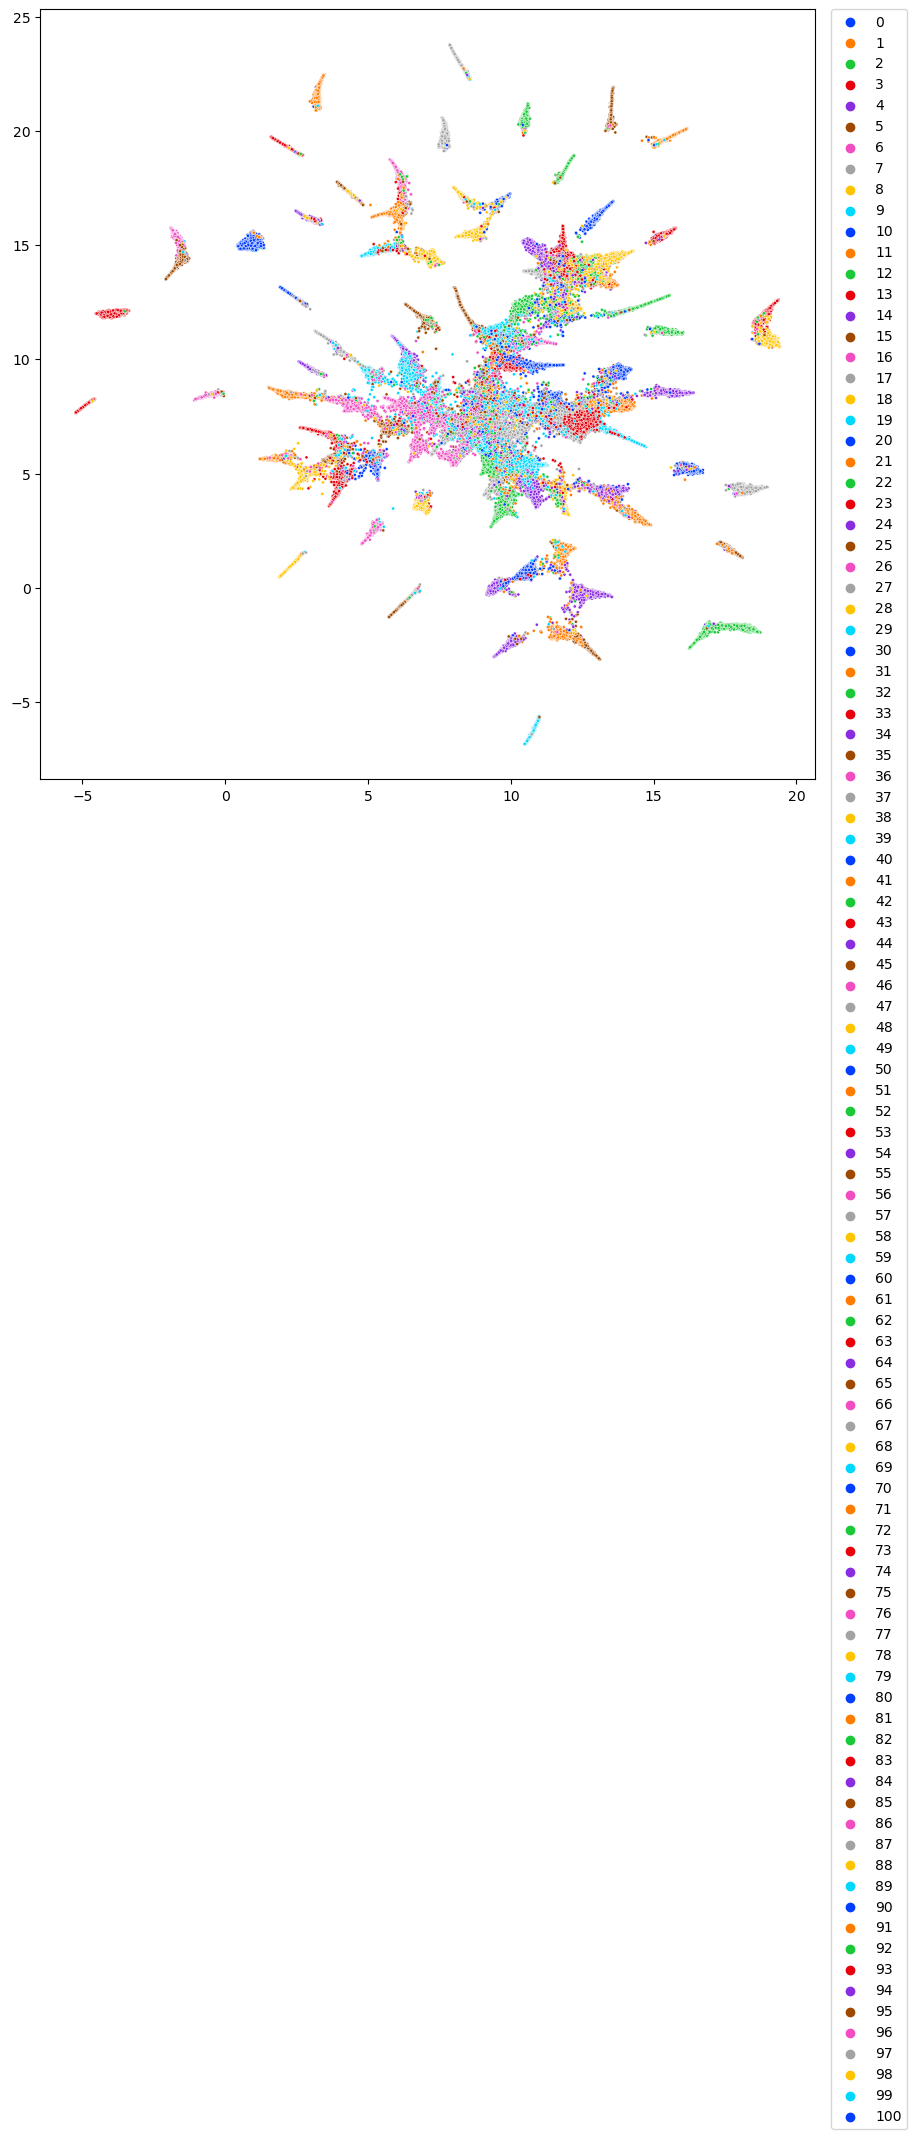

In [17]:
plt.subplots(figsize=[10, 10])
sns.scatterplot(x=umap_out[:, 0], y=umap_out[:, 1], hue=labels, palette=sns.color_palette("bright"), linewidth=0.3, alpha=1, s=5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# Play with Distance Distribution

### Get Neighbors

In [4]:
%%time

tree = NNDescent(embeddings)
neighbors, distance = tree.query(embeddings, k=16)
neighbors.shape, distance.shape

CPU times: user 2min 7s, sys: 6.69 s, total: 2min 14s
Wall time: 31.6 s


((60000, 16), (60000, 16))

### Old Graph and Result

In [5]:
src = torch.arange(0, 60_000).reshape(-1, 1).repeat((1, 15)).flatten().numpy()
dst = neighbors[:, 1:].flatten()
src.shape, dst.shape

((900000,), (900000,))

In [6]:
graph = dgl.graph((src, dst), num_nodes=60_000)
graph = dgl.add_self_loop(graph)
graph.ndata["feat"] = embeddings
graph.ndata["label"] = labels
graph.ndata["train_mask"] = torch.tensor([True] * 42500 + [False] * 17500)
graph.ndata["val_mask"] = torch.tensor([False] * 42500 + [True] * 7500 + [False] * 10000)
graph.ndata["test_mask"] = torch.tensor([False] * 50000 + [True] * 10000)
graph

Graph(num_nodes=60000, num_edges=960000,
      ndata_schemes={'feat': Scheme(shape=(1180,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

In [7]:
with open("Emb_graph.pickle", "wb") as f:
    pickle.dump(graph, f)

In [8]:
!python3 abc.py

Training with DGL built-in GATConv module.
    NumNodes: 60000
    NumEdges: 960000
    NumFeats: 1180
    NumClasses: 10
    NumTrainingSamples: 42500
    NumValidationSamples: 7500
    NumTestSamples: 10000
Training...
Epoch 00000 | Loss 5.2089 | Accuracy 0.6569 
Epoch 00020 | Loss 0.2689 | Accuracy 0.9055 
Epoch 00040 | Loss 0.1597 | Accuracy 0.9111 
Epoch 00060 | Loss 0.1335 | Accuracy 0.9124 
Epoch 00080 | Loss 0.1299 | Accuracy 0.9133 
Epoch 00100 | Loss 0.1198 | Accuracy 0.9147 
Epoch 00120 | Loss 0.1133 | Accuracy 0.9147 
Epoch 00140 | Loss 0.1094 | Accuracy 0.9149 
Epoch 00160 | Loss 0.1115 | Accuracy 0.9149 
Epoch 00180 | Loss 0.1092 | Accuracy 0.9147 
Epoch 00200 | Loss 0.1040 | Accuracy 0.9156 
Epoch 00220 | Loss 0.1072 | Accuracy 0.9152 
Epoch 00240 | Loss 0.1078 | Accuracy 0.9152 
Epoch 00260 | Loss 0.1081 | Accuracy 0.9155 
Epoch 00280 | Loss 0.1049 | Accuracy 0.9155 
Epoch 00300 | Loss 0.1036 | Accuracy 0.9148 
Epoch 00320 | Loss 0.1016 | Accuracy 0.9140 
Epoch 00340 | 

### Check distances

In [9]:
all_dist = distance[:, 1:].flatten()
all_dist.shape

(900000,)

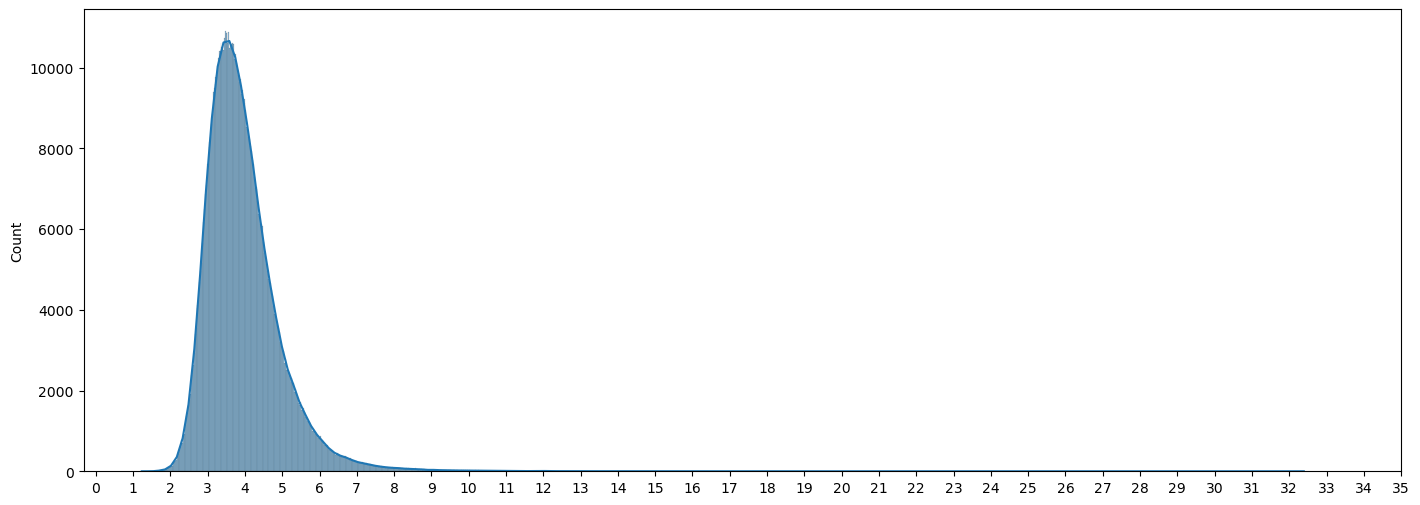

In [10]:
plt.subplots(figsize=[17, 6])
sns.histplot(x=all_dist, kde=True)
plt.xticks(ticks=range(0, 36), labels=range(0, 36));

### Drop neighbors with large distance

In [12]:
dist_mask = (distance[:, 1:] <= 5.5)
pure_neighbors = neighbors[:, 1:]
pure_neighbors[dist_mask] = -1

In [13]:
dist_mask.shape

(60000, 15)

### Make DGL Graph

In [14]:
src = torch.arange(0, 60_000).reshape(-1, 1).repeat((1, 15)).flatten().numpy()
dst = pure_neighbors.flatten()
src.shape, dst.shape

((900000,), (900000,))

In [15]:
graph = dgl.graph((src, dst), num_nodes=60_000)
graph = dgl.add_self_loop(graph)
graph.ndata["feat"] = embeddings
graph.ndata["label"] = labels
graph.ndata["train_mask"] = torch.tensor([True] * 42500 + [False] * 17500)
graph.ndata["val_mask"] = torch.tensor([False] * 42500 + [True] * 7500 + [False] * 10000)
graph.ndata["test_mask"] = torch.tensor([False] * 50000 + [True] * 10000)
graph

Graph(num_nodes=60000, num_edges=960000,
      ndata_schemes={'feat': Scheme(shape=(1180,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

In [16]:
with open("Emb_graph.pickle", "wb") as f:
    pickle.dump(graph, f)

In [3]:
!python3 abc.py

Training with DGL built-in GATConv module.
    NumNodes: 60000
    NumEdges: 1020000
    NumFeats: 1180
    NumClasses: 10
    NumTrainingSamples: 42500
    NumValidationSamples: 7500
    NumTestSamples: 10000
Training...
Traceback (most recent call last):
  File "/home/anirban/From_Scratch/abc.py", line 110, in <module>
    train(g, features, labels, masks, model)
  File "/home/anirban/From_Scratch/abc.py", line 70, in train
    logits = model(g, features)
  File "/home/anirban/anaconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1190, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/anirban/From_Scratch/abc.py", line 41, in forward
    h = layer(g, h)
  File "/home/anirban/anaconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1190, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/anirban/anaconda3/envs/myenv/lib/python3.10/site-packages/dgl/nn/pytorch/conv/gatconv.py", line 254, in 